In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

In [2]:
with h5py.File('coord.h5', 'r') as f:
    ##number of beads per polymer
    N=int(f['parameter/reference_Nbeads'][()]) 
    ##number of polymers
    n_polym=int(f['parameter/n_polymers'][()]) 
    n_poly_type=int(f['parameter/n_poly_type'][()]) 
    ##box dimensions 
    lxyz=np.array(f['parameter/lxyz'])
    ##box discretization
    nxyz=np.array(f['parameter/nxyz'])


#get ana stuff
with h5py.File('coord_ana.h5','r') as anafile:
    phi=np.array(anafile['density_field'])
    static_structure_factor=np.array(anafile['static_structure_factor'])
    delta_mc_phi=np.array(anafile['density_field'].attrs["DeltaMC"])
offset=1
scale=np.prod(nxyz-2*offset)/(N*n_polym)

phi=phi[:,:,offset:nxyz[0]-offset,offset:nxyz[1]-offset,offset:nxyz[2]-offset]
phi=phi.reshape(phi.shape[0],phi.shape[1],phi.shape[2],phi.shape[4])*scale
delta_phi=phi[:,0]-phi[:,1]
delta_phi.shape
V=5*5
rho0=n_polym*N/V
print(static_structure_factor.shape)
print(static_structure_factor[0,2,0])

(2, 5, 2, 4)
[30.58621389  0.          0.          0.        ]


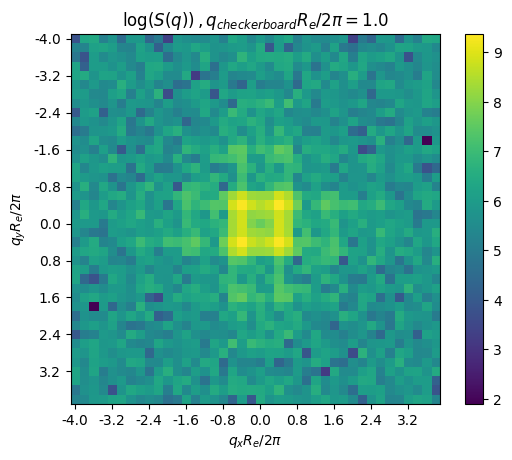

In [3]:
fourier = np.fft.fftshift(np.fft.fft2(delta_phi[1]))
S=N**2*rho0/(4*V)*np.abs(fourier)**2

magnitude_spectrum =np.log10(S)
#magnitude_spectrum=S
# Get the image dimensions
height, width = magnitude_spectrum.shape

# Set the frequency values for x and y axes
freq_x = np.fft.fftshift(np.fft.fftfreq(width))*8
freq_y = np.fft.fftshift(np.fft.fftfreq(height))*8

# Plot the magnitude spectrum
plt.imshow(magnitude_spectrum)
plt.colorbar()
plt.title(r'$\log(S( q))\,,$'+'$q_{checkerboard}R_e/2\pi=1.0$')
plt.xlabel(r'$q_xR_e/2\pi$')
plt.ylabel(r'$q_yR_e/2\pi$')

# Set the x and y tick labels
plt.xticks(np.arange(0, width, 4), labels=np.round(freq_x[::4], decimals=2))
plt.yticks(np.arange(0, height, 4), labels=np.round(freq_y[::4], decimals=2))
plt.savefig("struct_factor.pdf")
plt.show()